In [1]:
!pip install xgboost

유방암 가지치기 예제

In [1]:
import pandas as pd

from sklearn.datasets import load_breast_cancer #데이터 로드
from sklearn.model_selection import train_test_split #분할
from sklearn.metrics import accuracy_score #평가-정확도

cancer=load_breast_cancer()
df=pd.DataFrame(cancer.data, columns=cancer.feature_names) #df로 만들기
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [2]:
from sklearn.ensemble import VotingClassifier #앙상블; 보팅하기 위함
from sklearn.linear_model import LogisticRegression #연속적; 딥러닝,이진분류
from sklearn.neighbors import KNeighborsClassifier

In [17]:
#model 생성; 로지스틱+knn~앙상블
lr_clf=LogisticRegression()
knn_clf=KNeighborsClassifier(n_neighbors=8)

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('KNN',knn_clf)],voting='soft') #estimators는 list안에 tuple로 받음

#dataset 나누기
X_train,X_test,y_train,y_test=train_test_split(cancer.data,cancer.target,test_size=0.2,random_state=11)

#훈련; 앙상블 모델에 훈련&예측
vo_clf.fit(X_train,y_train)
pred=vo_clf.predict(X_test) #학습에 사용되지 않은 X_test의 데이터로 예측 ~~예측 레이블 데이터세트 추출
print(accuracy_score(y_test, pred)) #정확도 추출;실제 레이블 데이터세트(y_test)와 예측 레이블 데이터세트(pred)

0.9736842105263158


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [14]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, f1_score

accuracy=accuracy_score(y_test,pred)
confusion=confusion_matrix(y_test,pred)
precision=precision_score(y_test,pred)
recall=recall_score(y_test,pred)
f1=f1_score(y_test,pred)

print("오차행렬")
print(confusion)

print("정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1 스코어: {:.4f}".format(accuracy,precision, recall, f1))

오차행렬
[[35  3]
 [ 0 76]]
정확도: 0.9737, 정밀도: 0.9620, 재현율: 1.0000, f1 스코어: 0.9806


In [15]:
classifiers=[lr_clf, knn_clf]
for classifier in classifiers:
    classifier.fit(X_train,y_train)
    pred=classifier.predict(X_test)
    class_name=classifier.__class__.__name__ #class name 가져올 수 있음

    accuracy=accuracy_score(y_test,pred)
    precision=precision_score(y_test,pred)
    recall=recall_score(y_test,pred)
    f1=f1_score(y_test,pred)
    
    print("{} 정확도: {:.4f}, 정밀도: {:.4f}, 재현율: {:.4f}, f1 스코어: {:.4f}".format(class_name, accuracy,precision, recall, f1))

LogisticRegression 정확도: 0.9474, 정밀도: 0.9375, 재현율: 0.9868, f1 스코어: 0.9615
KNeighborsClassifier 정확도: 0.9561, 정밀도: 0.9383, 재현율: 1.0000, f1 스코어: 0.9682


C:\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


랜덤포레스트_행동 인식

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier #bagging

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/imRishabhGupta/Human-Activity-Recognition/master/train.csv")
df

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7347,0.299665,-0.057193,-0.181233,-0.195387,0.039905,0.077078,-0.282301,0.043616,0.060410,0.210795,...,-0.880324,-0.190437,0.829718,0.206972,-0.425619,-0.791883,0.238604,0.049819,30,WALKING_UPSTAIRS
7348,0.273853,-0.007749,-0.147468,-0.235309,0.004816,0.059280,-0.322552,-0.029456,0.080585,0.117440,...,-0.680744,0.064907,0.875679,-0.879033,0.400219,-0.771840,0.252676,0.050053,30,WALKING_UPSTAIRS
7349,0.273387,-0.017011,-0.045022,-0.218218,-0.103822,0.274533,-0.304515,-0.098913,0.332584,0.043999,...,-0.304029,0.052806,-0.266724,0.864404,0.701169,-0.779133,0.249145,0.040811,30,WALKING_UPSTAIRS
7350,0.289654,-0.018843,-0.158281,-0.219139,-0.111412,0.268893,-0.310487,-0.068200,0.319473,0.101702,...,-0.344314,-0.101360,0.700740,0.936674,-0.589479,-0.785181,0.246432,0.025339,30,WALKING_UPSTAIRS


In [5]:
df['Activity'].value_counts() #unique한 값 몇개인지 보여줌

LAYING                1407
STANDING              1374
SITTING               1286
WALKING               1226
WALKING_UPSTAIRS      1073
WALKING_DOWNSTAIRS     986
Name: Activity, dtype: int64

In [6]:
df['Activity'].groupby(df['Activity']).count()

Activity
LAYING                1407
SITTING               1286
STANDING              1374
WALKING               1226
WALKING_DOWNSTAIRS     986
WALKING_UPSTAIRS      1073
Name: Activity, dtype: int64

In [7]:
df.isna().sum().sum() #전체 결측치 볼 때 sum 두번

0

In [8]:
len(df.columns)

563

In [9]:
#X,y값 추출
X=df.drop('Activity',axis=1)
y=df['Activity']

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


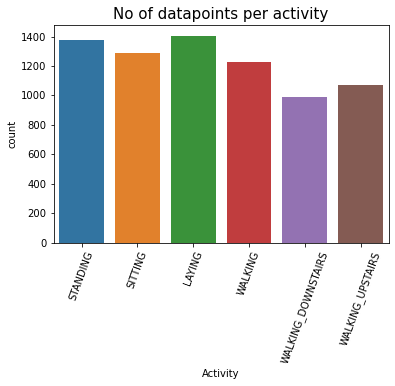

In [10]:
#그래프 그려보기
plt.title("No of datapoints per activity", fontsize=15)
sns.countplot(y) #y의 개수
plt.xticks(rotation=70) #x축 항목들 70도 기울여서
plt.show();

In [11]:
from sklearn.ensemble import RandomForestClassifier #bagging

In [12]:
rf_clf=RandomForestClassifier(random_state=42) #random_state 값 똑같이
#n_estimators; tree개수, max_depth;깊이, min_samples_leaf:pruning

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

rf_clf.fit(X_train,y_train)
pred=rf_clf.predict(X_test)
accuracy=accuracy_score(y_test,pred)
accuracy

0.9802855200543847

그리드서치로 랜덤 포레스트의 파라미터 튜닝

In [13]:
%%time

from sklearn.model_selection import GridSearchCV

#딕셔너리 형태) leaf;너무 잘게 쪼개지 않으려고, split;최소한 8개가 있어야 데이터 나눌 수 있음 ~~과적합 방지위해
params = {'n_estimators':[50,100,150], 'criterion':['gini','entropy'], 'max_depth':[6,8,10,12],
         'min_samples_leaf':[8,12,18],'min_samples_split':[8,16,20]}

#n_jobs;모든 cpu를 사용해서 계산하겠다
rf_clf=RandomForestClassifier(random_state=42,n_jobs=-1)
#estimator:model
grid_cv=GridSearchCV(rf_clf,param_grid=params,cv=2,n_jobs=-1)
grid_cv.fit(X_train,y_train)

Wall time: 19min 42s


GridSearchCV(cv=2, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [6, 8, 10, 12],
                         'min_samples_leaf': [8, 12, 18],
                         'min_samples_split': [8, 16, 20],
                         'n_estimators': [50, 100, 150]})

In [15]:
#best parameter 보여줌
grid_cv.best_params_

{'criterion': 'entropy',
 'max_depth': 12,
 'min_samples_leaf': 8,
 'min_samples_split': 8,
 'n_estimators': 100}

In [16]:
pred=grid_cv.best_estimator_.predict(X_test) #best parameter로 테스트 데이터 예측
accuracy=accuracy_score(y_test,pred)
accuracy #이 경우 더 잘게 쪼개는 랜덤 포레스트가 더 성능이 좋음

0.9755268524813052

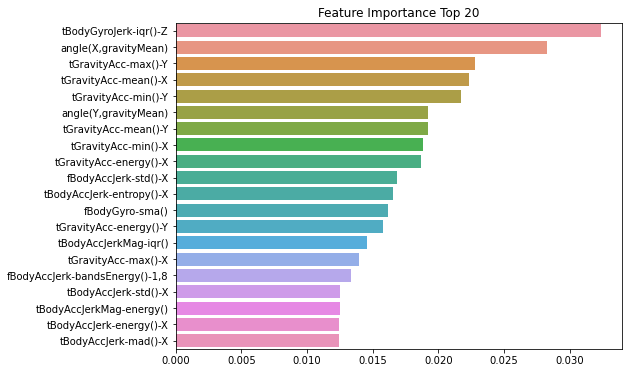

In [17]:
ftr_importance_values=grid_cv.best_estimator_.feature_importances_
ftr_importances=pd.Series(ftr_importance_values, index=X_train.columns)

ftr_top20=ftr_importances.sort_values(ascending=False)[:20] #열 너무 많으니 20개만
plt.figure(figsize=(8,6)) #가로가 8,세로가 6
plt.title("Feature Importance Top 20")
sns.barplot(x=ftr_top20, y=ftr_top20.index) #horizantal
plt.show();

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       280
           SITTING       0.95      0.96      0.95       262
          STANDING       0.96      0.95      0.96       276
           WALKING       0.99      0.99      0.99       247
WALKING_DOWNSTAIRS       0.99      0.97      0.98       206
  WALKING_UPSTAIRS       0.97      0.98      0.98       200

          accuracy                           0.98      1471
         macro avg       0.98      0.98      0.98      1471
      weighted avg       0.98      0.98      0.98      1471



GradientBoosting

In [20]:
%%time

from sklearn.ensemble import GradientBoostingClassifier

gb_clf=GradientBoostingClassifier(random_state=42)
gb_clf.fit(X_train,y_train)
gb_pred=gb_clf.predict(X_test)
gb_accuracy=accuracy_score(y_test,gb_pred)
gb_accuracy

Wall time: 15min 12s


0.9891230455472467

xgboost 방법

In [23]:
import xgboost
xgboost.__version__

'1.5.1'

In [30]:
%%time

from xgboost import XGBClassifier
xgb_clf=XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
evals=[(X_test,y_test)]
xgb_clf.fit(X_train,y_train, eval_set=evals, eval_metric='mlogloss',early_stopping_rounds=400, verbose=False)

#fit할 때 옵션 필요
#eval_set; train을 train과 test(validation set)로 나눔->train으로 훈련->valid로
#==>train만 보면 loss는 계속 줄어들기 때문에 과적합 일어나는 지점 찾기 위해 valid 사용
#eval_metric: 뭘 기준으로 평가할지 ~mlogloss; multiple cross entropy같은 것; 뒤에 나옴
#early_stopping: 성능향상 일어나지 않을 때 멈추는 것; 400번 찍어봤는데 성능향상 없으면 stop!; 시간 단축 가능

Wall time: 6min 36s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=400, n_jobs=4,
              num_parallel_tree=1, objective='multi:softprob', predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=None,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

In [33]:
xgb_pred=xgb_clf.predict(X_test) #xgb 분류기로 예측
xgb_accuracy=accuracy_score(y_test,xgb_pred)
xgb_accuracy

0.9972807613868117

In [37]:
xgb_pred_proba=xgb_clf.predict_proba(X_test)
xgb_pred_proba[0]
#xgb_pred 각각의 확률이 어느정도인지 보여줌; classification은 확률로 표현
#xgb_pred[0]는 'WALKING_DOWNSTAIRS' ~~ 예측값이 이거일때 각각의 확률 표시; 확률적으로 누가 제일 그럴듯한지

array([3.2208620e-06, 6.2387358e-07, 7.9608317e-06, 2.0843905e-05,
       9.9991143e-01, 5.5966349e-05], dtype=float32)

[비지도학습] K-Means clustering

In [46]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np

In [50]:
#클러스터링 되어 있는 샘플 데이터 만들기
#눈으로 보려고 feature 2로만 한 것
#x,y 라벨이 없는 데이터를 무게중심으로 나눌 수 있음
X_data, y_data = make_blobs(n_samples=150,n_features=2, centers=3, cluster_std=0.5, shuffle=True, random_state=42)

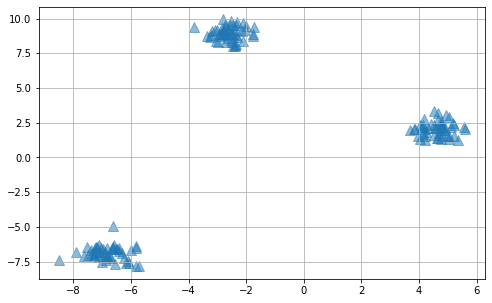

In [52]:
#클러스터링 되어 있는 샘플 데이터 그림 그리기
plt.figure(figsize=(8,5))
plt.scatter(X_data[:,0], X_data[:,1],marker='^',s=100,alpha=0.5) #[:,0] = 모든행의 0번째 열 가져옴
plt.grid()
plt.show();

In [75]:
km=KMeans(n_clusters=4, init='random',n_init=100,max_iter=300,tol=1e-4,random_state=42)
km=km.fit(X_data) #data만 주고 훈련
#init: 초기화 방법; random이면 무작위, k-means++면 k-평균++방법
#n_init: 초기 중심위치 시도 횟수. 디폴트는 10이고 10개의 무작위 중심위치 목록 중 가장 좋은 값을 선택
#max_iter: 최대 반복 횟수
#random_state: 시드값

In [83]:
km.labels_ #km해서 나온 라벨값

array([2, 2, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 0, 1, 0, 2, 3, 2, 0, 0, 2, 1,
       0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 3, 2, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 3, 2, 1, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 2, 0,
       3, 2, 3, 2, 2, 1, 3, 0, 1, 3, 2, 0, 0, 0, 2, 2, 0, 2, 3, 0, 2, 1,
       3, 2, 0, 1, 3, 0, 3, 0, 1, 2, 1, 1, 0, 1, 2, 3, 3, 0, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 3, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0])

In [76]:
y_km=km.predict(X_data)
y_km #predict한 값

array([2, 2, 3, 0, 3, 0, 2, 2, 1, 0, 3, 3, 0, 1, 0, 2, 3, 2, 0, 0, 2, 1,
       0, 3, 0, 1, 1, 2, 3, 0, 0, 2, 1, 1, 0, 0, 1, 1, 0, 2, 2, 3, 2, 2,
       0, 2, 2, 0, 2, 1, 2, 0, 0, 2, 2, 1, 2, 0, 3, 2, 1, 3, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 2, 0,
       3, 2, 3, 2, 2, 1, 3, 0, 1, 3, 2, 0, 0, 0, 2, 2, 0, 2, 3, 0, 2, 1,
       3, 2, 0, 1, 3, 0, 3, 0, 1, 2, 1, 1, 0, 1, 2, 3, 3, 0, 0, 1, 2, 2,
       0, 0, 2, 0, 1, 0, 0, 3, 2, 2, 1, 0, 2, 2, 1, 2, 2, 0])

In [77]:
km.cluster_centers_ #centroid 좌표

array([[ 4.6119778 ,  2.05815704],
       [-7.1882691 , -6.69009491],
       [-2.60533164,  8.95858242],
       [-6.38075266, -7.11332156]])

In [78]:
X_data[y_km==0,0] #numpy에 조건 주면 그 조건에 맞는 인덱스에 있는 애만 가져옴

array([5.58297179, 4.95271251, 4.21648198, 4.62252295, 4.152538  ,
       4.76512526, 3.86454712, 4.52814744, 4.10443259, 4.54369835,
       4.90084962, 4.93330738, 5.04663744, 4.51718478, 5.21917663,
       5.05090892, 5.34127599, 4.10872698, 5.1215669 , 4.87649765,
       4.81877252, 4.7536088 , 4.04422709, 4.66999394, 4.14461067,
       4.76982023, 4.02140348, 4.74692571, 4.18016672, 4.24825219,
       4.6689832 , 4.29986648, 4.78641507, 4.41662136, 4.50755042,
       4.7264693 , 5.03539481, 5.21129024, 3.68049323, 4.77822424,
       3.83613722, 4.19512162, 4.76865403, 5.57276609, 3.95104415,
       4.64637978, 4.60132798, 4.68970452, 5.18140446, 4.19795012])

In [82]:
test_data=np.array([0.1,0.3,0.7])
test_data

array([0.1, 0.3, 0.7])

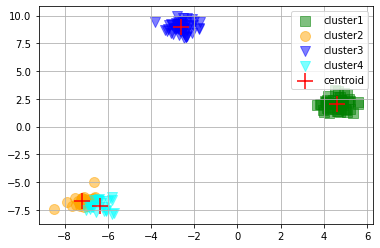

In [81]:
plt.scatter(X_data[y_km==0,0], X_data[y_km==0,1], s=100, c='green',marker='s',alpha=0.5, label='cluster1')
plt.scatter(X_data[y_km==1,0], X_data[y_km==1,1], s=100, c='orange',marker='o',alpha=0.5, label='cluster2')            
plt.scatter(X_data[y_km==2,0], X_data[y_km==2,1], s=100, c='blue',marker='v',alpha=0.5, label='cluster3')
plt.scatter(X_data[y_km==3,0], X_data[y_km==3,1], s=100, c='cyan',marker='v',alpha=0.5, label='cluster4') 
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1], s=250, marker='+', c='red', label='centroid')

plt.legend()
plt.grid()
plt.show();

K-Means Elbow Method

In [84]:
X_data, y_data = make_blobs(n_samples=200,n_features=2, centers=5, cluster_std=0.5, shuffle=True, random_state=42)

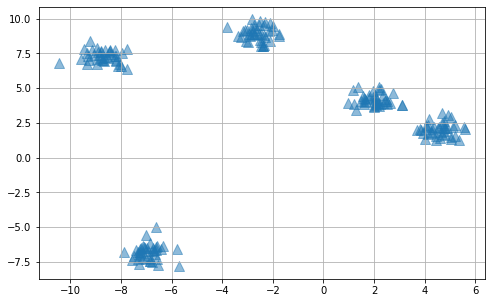

In [85]:
plt.figure(figsize=(8,5))
plt.scatter(X_data[:,0], X_data[:,1],marker='^',s=100,alpha=0.5)
plt.grid()
plt.show();

In [87]:
distortions=[]
for c_num in range(2,10):
    km = KMeans(n_clusters=c_num, init='random', n_init=100, max_iter=3000, random_state=42,verbose=False)
    km.fit(X_data)
    distortions.append(km.inertia_) #inertia; 거리계산한 값(centroid와 얼마나 가까운지); elbow에서 사용

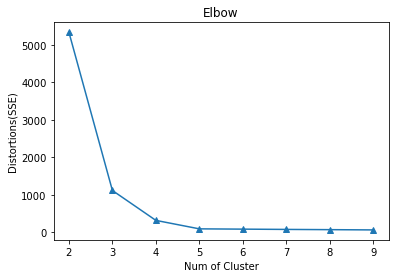

In [88]:
plt.plot(range(2,10), distortions, marker='^') #plot(x,y)
plt.xlabel("Num of Cluster")
plt.ylabel("Distortions(SSE)") #SSE==inertia; centroid에서 가장 가까운 클러스터 내 각 지점까지의 거리 합
plt.title("Elbow")
plt.show(); #최적의 k는 4나 5

silhouette 품질평가

In [89]:
import numpy as np
from sklearn.metrics import silhouette_samples
from matplotlib import cm

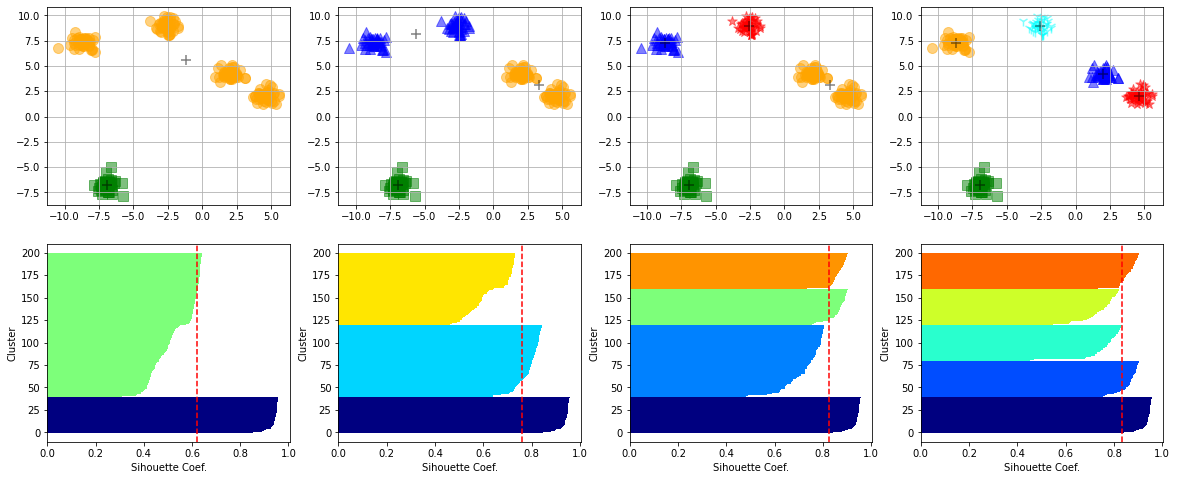

In [98]:
fig, axs = plt.subplots(figsize=(20, 8), nrows=2, ncols=4)
for idx, c_num in enumerate(range(2, 6)):
    km = KMeans(n_clusters=c_num, init='random', n_init=100, max_iter=3000, random_state=42, verbose=False)
    km.fit(X_data)
    y_km = km.predict(X_data)
    
    low_idx = 0
    col_idx = idx%4
    
    axs[low_idx][col_idx].scatter(X_data[y_km==0, 0], X_data[y_km==0, 1], 
                                  s=100, c='green', marker='s', alpha=0.5, label='C-1')
    axs[low_idx][col_idx].scatter(X_data[y_km==1, 0], X_data[y_km==1, 1], 
                                  s=100, c='orange', marker='o', alpha=0.5, label='C-2')
    axs[low_idx][col_idx].scatter(X_data[y_km==2, 0], X_data[y_km==2, 1], 
                                  s=100, c='blue', marker='^', alpha=0.5, label='C-3')
    axs[low_idx][col_idx].scatter(X_data[y_km==3, 0], X_data[y_km==3, 1], 
                                  s=100, c='red', marker='*', alpha=0.5, label='C-4')
    axs[low_idx][col_idx].scatter(X_data[y_km==4, 0], X_data[y_km==4,1], s=100, c='cyan', marker='1', 
                                  alpha=0.5, label='C-5')
    
    axs[low_idx][col_idx].scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], s=100, c='black', marker='+', 
                                  alpha=0.5, label='centroid')
    axs[low_idx][col_idx].grid()
    
    cluster_labels=np.unique(y_km)
    n_clusters=len(cluster_labels)
    silhouette_vals=silhouette_samples(X_data,y_km,metric='euclidean') #유클리디안 거리로 측정
    
    #그림 그리기 위한 코드
    y_ax_lower,y_ax_upper=0,0
    yticks=[]
    low_idx=1
    for i,c in enumerate(cluster_labels):
        c_silhouette_vals = silhouette_vals[y_km==c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color=cm.jet(float(i) / n_clusters)
        axs[low_idx][col_idx].barh(range(y_ax_lower,y_ax_upper), c_silhouette_vals, height=1.0, 
                                   edgecolor='none', color=color)
        yticks.append((y_ax_lower+y_ax_upper) / 2.0)
        y_ax_lower += len(c_silhouette_vals)
        
    silhouette_avg = np.mean(silhouette_vals)
    
    axs[low_idx][col_idx].axvline(silhouette_avg, color='red', linestyle='--')
    axs[low_idx][col_idx].set_ylabel("Cluster")
    axs[low_idx][col_idx].set_xlabel("Sihouette Coef.")

#각 그래프에 해당하는 실루엣 계수; k=5로 결정(k 최적값)

In [ ]:
# 